<h1><center>Machine Learning Project - AVAZU<center></h1>


In [ ]:
import sys
from zipfile import ZipFile
import os.path as op
try:
    from urllib.request import urlretrieve
except ImportError:  # Python 2 compat
    from urllib import urlretrieve

AVAZU_URL = "https://bianchi.wp.imt.fr/files/2019/05/train-1000000.zip"
AVAZU_FILENAME = AVAZU_URL.rsplit('/', 1)[1]


if not op.exists(AVAZU_FILENAME):
    print('Downloading %s to %s...' % (AVAZU_URL, AVAZU_FILENAME))
    urlretrieve(AVAZU_URL, AVAZU_FILENAME)
    ZipFile(AVAZU_FILENAME).extractall('.')

In [ ]:
ZipFile(AVAZU_FILENAME).extractall('.')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

Data description here: https://www.kaggle.com/c/avazu-ctr-prediction/data  


In [ ]:
df = pd.read_csv('train-1000000')

##Work assignment

1.   Perform Exploratory Data Analysis (EDA)
2.   Predict the probability that an add is clicked, based on the features.
3.   Evaluate the performance of your method.

##Work evaluation

Your work will be evaluated based on:

*   The interest of the EDA (4 points)
*   The quality of the comments/remarks throughout the notebook (4 points)
*   The feature engineering (5 points)
*   The efforts made in trying several predictors and tuning them (5 points)
*   The relevance of the performance criteria used to conclude (2 points)
*   BONUS (+1pt) : Register to the AVAZU challenge in Kaggle. What is your rank?

You may find the following script useful to convert the raw time stamp into a more useable feature. For instance, you may generate new pandas series using the code:

```
df['hour'].apply(lambda x:datesplit(x).weekday())
df['hour'].apply(lambda x:datesplit(x).hour)
```



In [ ]:
import datetime
def datesplit(originalDate):
    originalDate = str(originalDate)

    year = int("20" + originalDate[0:2])
    month = int(originalDate[2:4])
    day = int(originalDate[4:6])
    hour = int(originalDate[6:8])

    return datetime.datetime(year, month, day, hour)

# Exemple :
datesplit(14102915).day, datesplit(14102915).hour,datesplit(14102915).month

(29, 15, 10)

## Exploratory Data Analysis

Watch as I try 100 different things with the non sensical data to try to make sense out of it.

In [ ]:
df.head(10)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,3.983206e+18,0,14102915,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,2,4687,320,50,423,2,39,100148,32
1,7.756884e+18,0,14103007,1002,0,cb809abf,74acf31a,50e219e0,ecad2386,7801e8d9,...,0,0,17894,320,50,2039,2,39,100077,32
2,6.941774e+17,0,14102711,1005,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,...,1,0,22684,320,50,2619,1,163,100055,71
3,2.664154e+18,1,14102903,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,...,1,0,23222,320,50,2676,0,35,100176,221
4,1.480510e+19,0,14102902,1005,1,791b5571,fd13bc73,f028772b,ecad2386,7801e8d9,...,1,0,8330,320,50,761,3,175,100081,23
5,1.591127e+19,0,14102700,1005,0,85f751fd,c4e18dd6,50e219e0,febd1138,82e27996,...,1,0,21611,320,50,2480,3,297,100111,61
6,4.149473e+18,0,14102408,1010,1,85f751fd,c4e18dd6,50e219e0,03a08c3f,7801e8d9,...,4,3,15704,320,50,1722,0,35,100084,79
7,1.085379e+19,0,14102904,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,...,1,0,23224,320,50,2676,0,35,100176,221
8,2.629918e+18,0,14102513,1010,1,85f751fd,c4e18dd6,50e219e0,8486dd4e,7801e8d9,...,4,0,17875,320,50,2036,3,47,-1,156
9,1.419062e+19,0,14102600,1010,1,85f751fd,c4e18dd6,50e219e0,04f2be5f,7801e8d9,...,4,3,22552,320,50,2602,0,163,100084,182


We create new columns for the weekday, and the hour, the date

In [ ]:
df['weekday'] = df['hour'].apply(lambda x:datesplit(x).weekday())

In [ ]:
df['day'] = df['hour'].apply(lambda x:datesplit(x).day)

In [ ]:
df['month'] = df['hour'].apply(lambda x:datesplit(x).month)

In [ ]:
df['year'] = df['hour'].apply(lambda x:datesplit(x).year)

In [ ]:
df['hour'] = df['hour'].apply(lambda x:datesplit(x).hour)

In [ ]:
df['year'].unique()

array([2014])

The year is the same for all data- we drop this

In [ ]:
df.drop('year',axis=1,inplace=True)

In [ ]:
df['month'].unique()

array([10])

Similary, the data is all in the same month- we drop it

In [ ]:
df.drop('month',axis=1,inplace=True)

In [ ]:
df['hour'].unique()

array([15,  7, 11,  3,  2,  0,  8,  4, 13, 20,  5, 21, 18, 17, 10, 14, 19,
        6, 23, 12,  1, 16,  9, 22])

Now we investigate the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 26 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1000000 non-null  float64
 1   click             1000000 non-null  int64  
 2   hour              1000000 non-null  int64  
 3   C1                1000000 non-null  int64  
 4   banner_pos        1000000 non-null  int64  
 5   site_id           1000000 non-null  object 
 6   site_domain       1000000 non-null  object 
 7   site_category     1000000 non-null  object 
 8   app_id            1000000 non-null  object 
 9   app_domain        1000000 non-null  object 
 10  app_category      1000000 non-null  object 
 11  device_id         1000000 non-null  object 
 12  device_ip         1000000 non-null  object 
 13  device_model      1000000 non-null  object 
 14  device_type       1000000 non-null  int64  
 15  device_conn_type  1000000 non-null  int64  
 16  C

We investigate the hour feature

hour
0    3831
1    4562
2    5341
3    6067
4    7524
Name: click, dtype: int64


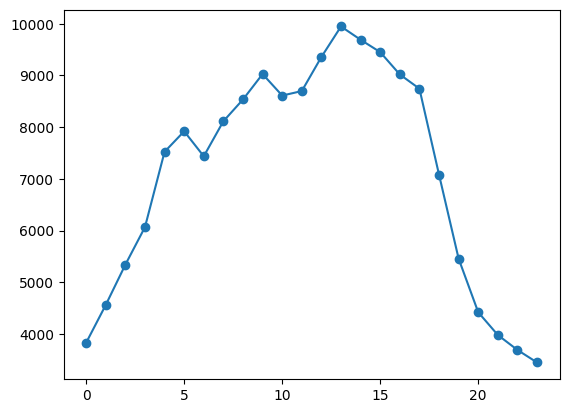

In [ ]:
hourly_clicks = df.groupby('hour')['click'].sum()
print(hourly_clicks.head())
plt.plot(hourly_clicks.index, hourly_clicks.values, marker='o', linestyle='-')

It is evident that depending on the hour of the day, the clicks can be different. So this is a useful feature  

Similarly we look at the weekday

weekday
0    14624
1    37628
2    35926
3    34789
4    14331
Name: click, dtype: int64


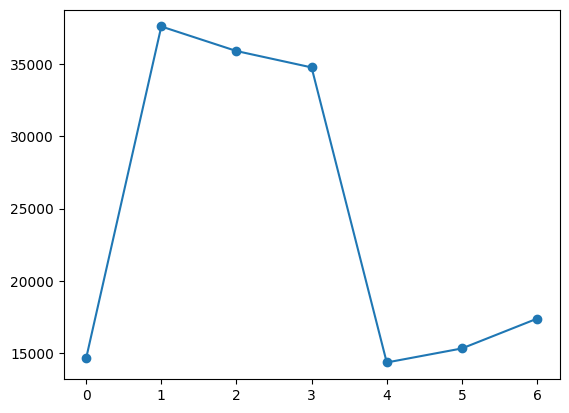

In [ ]:
weekly_clicks = df.groupby('weekday')['click'].sum()
print(weekly_clicks.head())
plt.plot(weekly_clicks.index, weekly_clicks.values, marker='o', linestyle='-')

Same is evident for weekdays- on certain days there are more clicks. This is a useful feature  

 We look at id column now


In [ ]:
df['id'].nunique()

1000000

Nothing to learn from this column, since it is all unique values. We drop it

In [ ]:
df.drop(['id'], axis=1, inplace=True)

We look at banner_pos:

banner_pos
0    719444
1    278805
7      1074
2       326
4       176
5       131
3        44
Name: count, dtype: int64


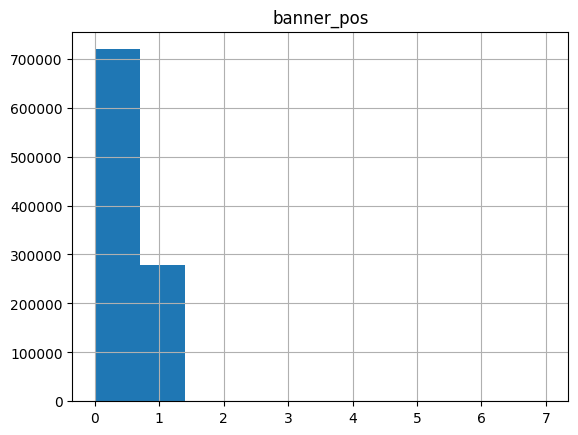

In [ ]:
df.hist(column = 'banner_pos')
print(df['banner_pos'].value_counts())

The values are not uniformly distributed

banner_pos
0    118235
1     51324
2        35
3         6
4        21
Name: click, dtype: int64


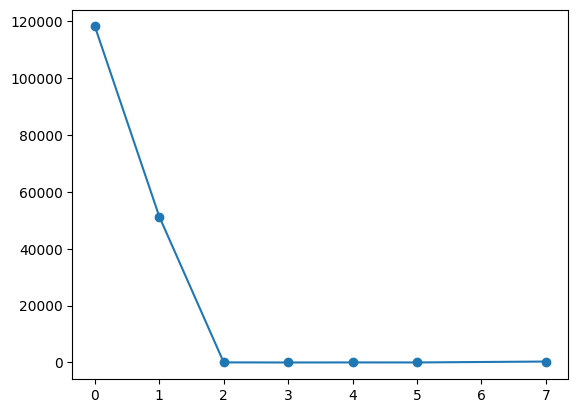

In [ ]:
feature_clicks = df.groupby('banner_pos')['click'].sum()
print(feature_clicks.head())
plt.plot(feature_clicks.index, feature_clicks.values, marker='o', linestyle='-')

We can merge the values 2-7 since they have little presence and very little clicks compared to the rest.

In [ ]:
df.banner_pos.replace([2,3,4,5,7], 2, inplace = True)

banner_pos
0    118235
1     51324
2       412
Name: click, dtype: int64


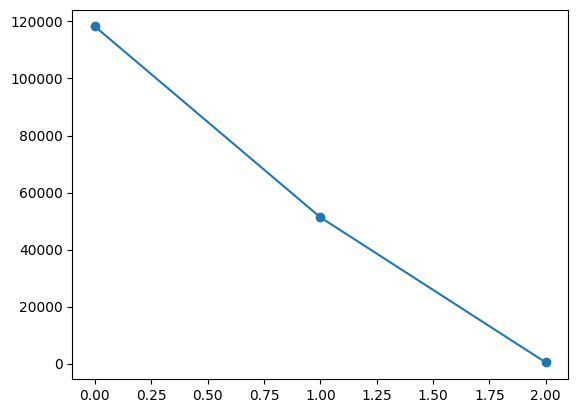

In [ ]:
feature_clicks = df.groupby('banner_pos')['click'].sum()
print(feature_clicks.head())
plt.plot(feature_clicks.index, feature_clicks.values, marker='o', linestyle='-')

Now it looks better.

Let's look at C1


C1
1005    918606
1002     54907
1010     22409
1012      2854
1007       871
1001       222
1008       131
Name: count, dtype: int64
7


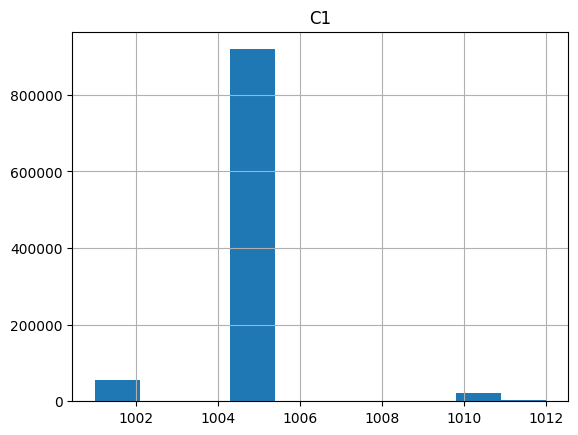

In [ ]:
column = 'C1'
df.hist(column)
print(df[column].value_counts()[:50])
print(len(df[column].value_counts()))

The values 1012, 1007, 1001, 1008 have little occurrence. We merge them together.

In [ ]:
df.C1.replace([1012,1007,1001,1008], 1001, inplace = True)

C1
1001       557
1002     11594
1005    155680
1010      2140
Name: click, dtype: int64


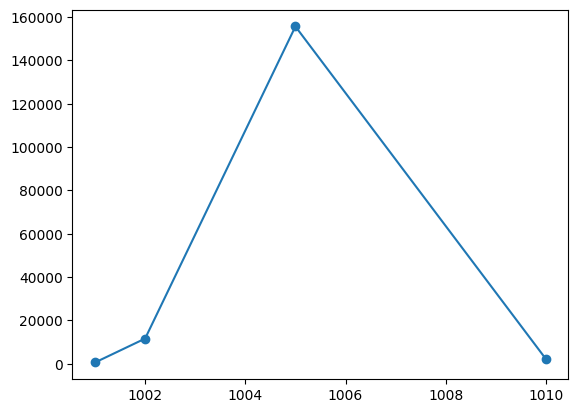

In [ ]:
feature_clicks = df.groupby('C1')['click'].sum()
print(feature_clicks.head())
plt.plot(feature_clicks.index, feature_clicks.values, marker='o', linestyle='-')

We investigate the other categories similarly

<Axes: >

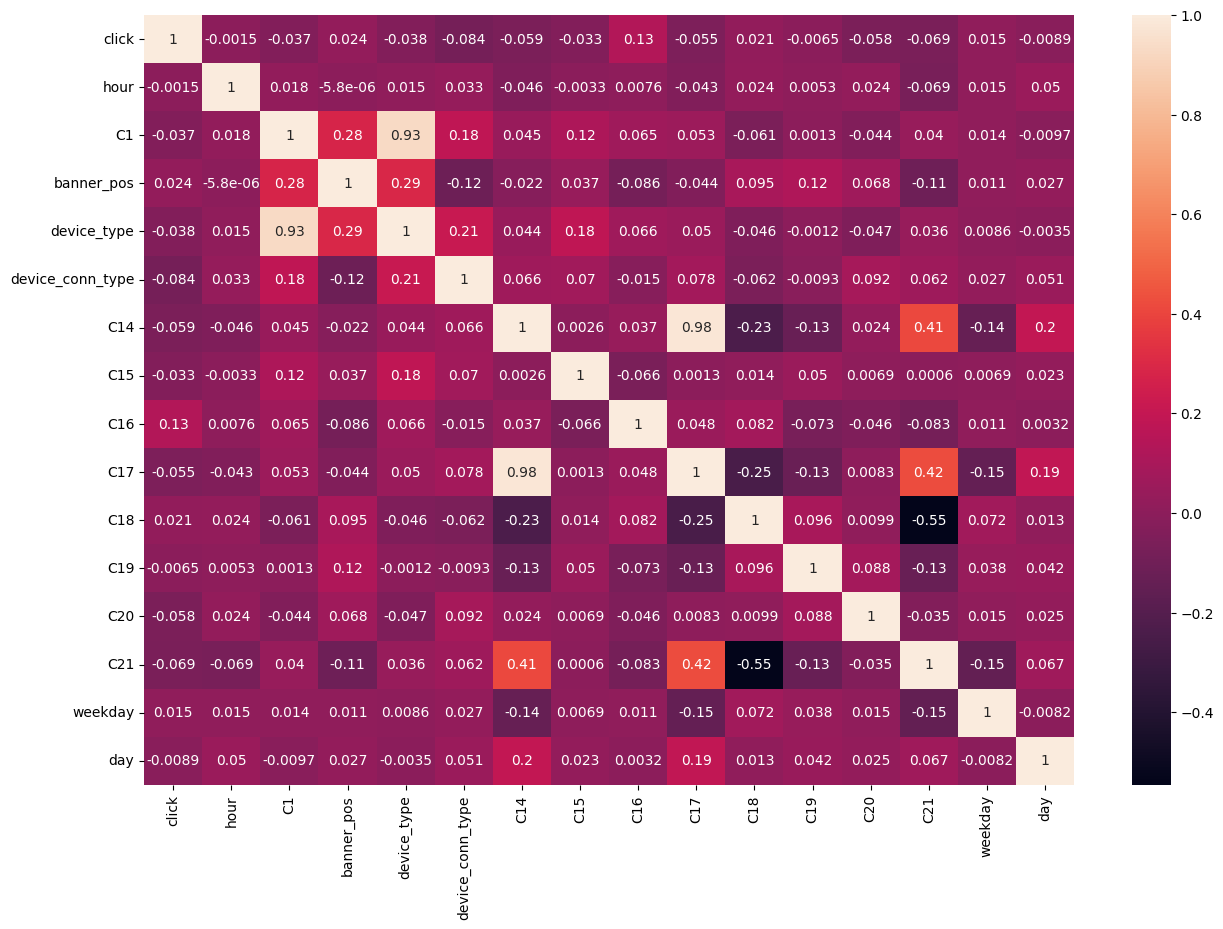

In [ ]:
df_numer = df.select_dtypes(include=np.number)

corr = df_numer.corr()
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, ax=ax, annot=True)
# plt.title("Pearson correlation of Features", y=1.05, size=15)

C14 and C17 seem to have (very) high correlation. We drop C14

In [ ]:
df.drop(['C14'], axis=1, inplace=True)

In [ ]:
df['C20'].value_counts()

C20
-1         468959
 100084     60183
 100148     44519
 100111     41902
 100077     39088
            ...  
 100157         2
 100098         2
 100100         1
 100246         1
 100078         1
Name: count, Length: 163, dtype: int64

C20
-1         90491
 100000      315
 100001       24
 100002       20
 100003      124
Name: click, dtype: int64


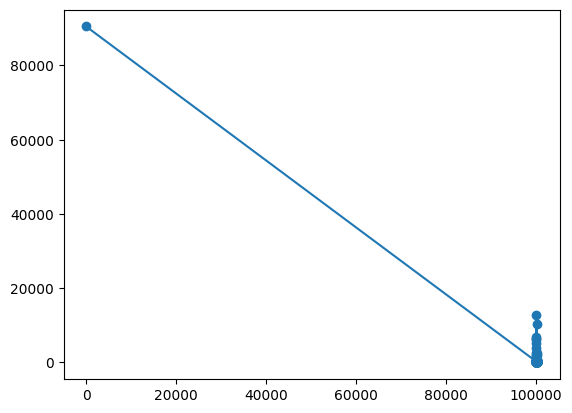

In [ ]:
feature_clicks = df.groupby('C20')['click'].sum()
print(feature_clicks.head())
plt.plot(feature_clicks.index, feature_clicks.values, marker='o', linestyle='-')

C20 has a ton of -1 values, which are not helpful. We drop C20

In [ ]:
df.drop(['C20'], axis=1, inplace=True)

In [ ]:
df.nunique()

click                    2
hour                    24
C1                       4
banner_pos               3
site_id               2651
site_domain           2871
site_category           22
app_id                3157
app_domain             198
app_category            26
device_id           150501
device_ip           555248
device_model          5168
device_type              5
device_conn_type         4
C15                      8
C16                      9
C17                    420
C18                      4
C19                     66
C21                     60
weekday                  7
day                     10
dtype: int64

In [ ]:
df.head(10)

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C15,C16,C17,C18,C19,C21,weekday,day
0,0,15,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,...,1,2,320,50,423,2,39,32,2,29
1,0,7,1002,0,cb809abf,74acf31a,50e219e0,ecad2386,7801e8d9,07d7df22,...,0,0,320,50,2039,2,39,32,3,30
2,0,11,1005,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,cef3e649,...,1,0,320,50,2619,1,163,71,0,27
3,1,3,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,0f2161f8,...,1,0,320,50,2676,0,35,221,2,29
4,0,2,1005,1,791b5571,fd13bc73,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,320,50,761,3,175,23,2,29
5,0,0,1005,0,85f751fd,c4e18dd6,50e219e0,febd1138,82e27996,0f2161f8,...,1,0,320,50,2480,3,297,61,0,27
6,0,8,1010,1,85f751fd,c4e18dd6,50e219e0,03a08c3f,7801e8d9,0f2161f8,...,4,3,320,50,1722,0,35,79,4,24
7,0,4,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,0f2161f8,...,1,0,320,50,2676,0,35,221,2,29
8,0,13,1010,1,85f751fd,c4e18dd6,50e219e0,8486dd4e,7801e8d9,0f2161f8,...,4,0,320,50,2036,3,47,156,5,25
9,0,0,1010,1,85f751fd,c4e18dd6,50e219e0,04f2be5f,7801e8d9,0f2161f8,...,4,3,320,50,2602,0,163,182,6,26


We observe there are many columns have many unique values like site_id, site_domain, site_category, etc. We use label encoding, since one hot encoding will produce huge number of features, and is impractical


In [ ]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
scaler = MinMaxScaler(feature_range=(0,1))
encoder = LabelEncoder()

In [ ]:
sparse_features = ['banner_pos',
  'site_id',
  'site_domain',
  'site_category',
  'app_id',
  'app_domain',
  'app_category',
  'device_id',
  'device_ip',
  'device_model',
  'device_type',
  'device_conn_type']

dense_features = [
    'C1','C15', 'C16', 'C17', 'C18', 'C19', 'C21', 'weekday', 'day','hour'
]

In [ ]:
data = df.copy()
data=data[sparse_features+dense_features+['click']]
for sparse_feature in sparse_features:
    data[sparse_feature] = encoder.fit_transform(data[sparse_feature])
data[dense_features] = scaler.fit_transform(data[dense_features])

In [ ]:
data.head()

,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,...,C15,C16,C17,C18,C19,C21,weekday,day,hour,click
0,1,2311,1426,20,2911,90,0,99837,545387,3815,...,0.221239,0.02988,0.117580,0.666667,0.003322,0.122047,0.333333,0.888889,0.652174,0
1,0,2084,1325,5,2911,90,0,91479,374125,2536,...,0.221239,0.02988,0.728544,0.666667,0.003322,0.122047,0.500000,1.000000,0.304348,0
2,0,1363,2232,5,2867,174,21,99837,252593,1217,...,0.221239,0.02988,0.947826,0.333333,0.071982,0.275591,0.000000,0.666667,0.478261,0
3,0,1363,2232,5,2045,140,3,99837,358190,3978,...,0.221239,0.02988,0.969376,0.000000,0.001107,0.866142,0.333333,0.888889,0.130435,1
4,1,1242,2833,20,2911,90,0,99837,464279,3353,...,0.221239,0.02988,0.245369,1.000000,0.078627,0.086614,0.333333,0.888889,0.086957,0


Looks fine! .. till now. We import the split some of this data to test it on different models

## Splitting the data for testing different models

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['click'])
y = data['click']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Testing Different Models (Logistic Regression, Random Forest, XGBoost)![Screenshot 2024-04-19 232811.png](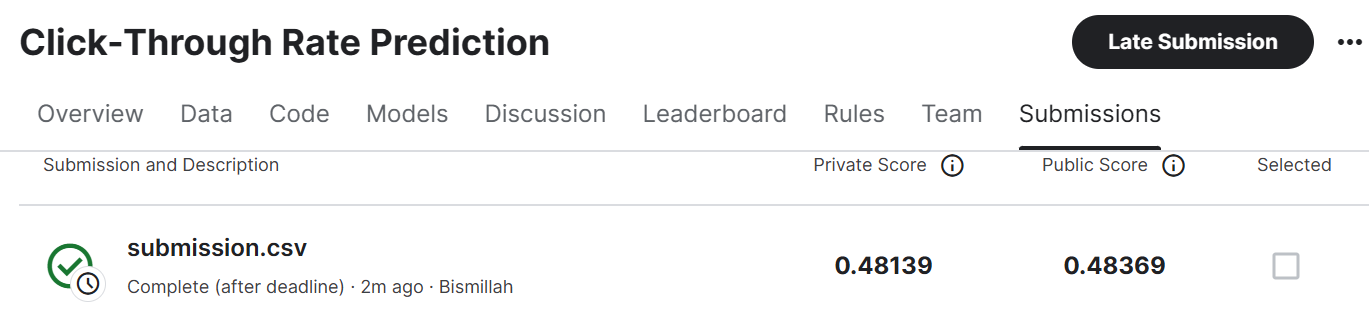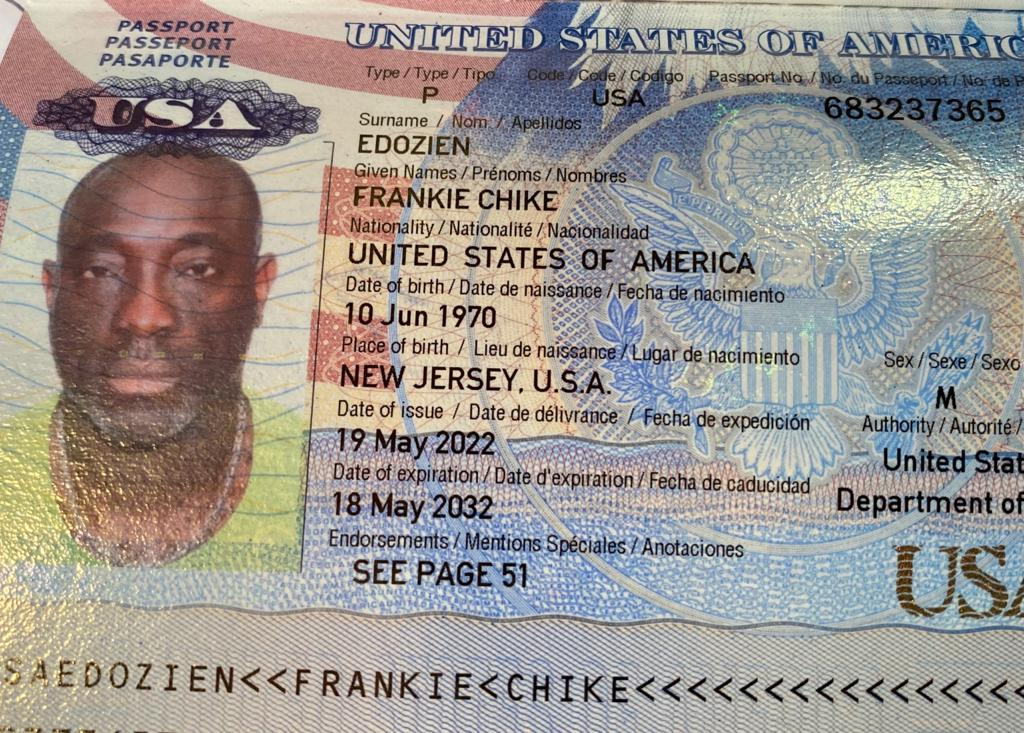)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [ ]:
from sklearn.metrics import log_loss

Logistic Regression

In [ ]:
# 1. Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_pred_proba = logistic_model.predict_proba(X_test)
logistic_log_loss = log_loss(y_test, logistic_pred_proba)
print("Logistic Regression Logarithmic Loss:", logistic_log_loss)

Logistic Regression Logarithmic Loss: 0.45688800291268605


Random Forest

In [ ]:
# 2. Random Forest Classifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
random_forest_pred_proba = random_forest_model.predict_proba(X_test)
random_forest_log_loss = log_loss(y_test, random_forest_pred_proba)
print("Random Forest Classifier Logarithmic Loss:", random_forest_log_loss)

Random Forest Classifier Logarithmic Loss: 0.618971767031226


XGBoost

In [ ]:
# 3. XGBoost
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred_proba = xgb_model.predict_proba(X_test)
xgb_log_loss = log_loss(y_test, xgb_pred_proba)
print("XGBoost Classifier Logarithmic Loss:", xgb_log_loss)

XGBoost Classifier Logarithmic Loss: 0.4009932179824718


XGBoost seems to perform the best out of all three

Just to test that this is not random, we test the predictions against an all-zero prediction

In [ ]:
all_zero_pred_proba = np.zeros((len(y_test), 2))
all_zero_log_loss = log_loss(y_test, all_zero_pred_proba)
print("All Zeroes Logarithmic Loss:", all_zero_log_loss)

All Zeroes Logarithmic Loss: 0.6931471805599453


## Cross Validation

Since we roughly know what models are good, we use cross validation to find optimal parameters


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Hyperparameters
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

logistic_model = LogisticRegression()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(logistic_model, parameters, cv=5, scoring='neg_log_loss')
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

# Train model with best parameters
best_logistic_model = LogisticRegression(**best_params)
best_logistic_model.fit(X_train, y_train)

# Predict probabilities
logistic_pred_proba = best_logistic_model.predict_proba(X_test)

# Calculate log loss
logistic_log_loss = log_loss(y_test, logistic_pred_proba)

print("Best parameters:", best_params)
print("Best logistic regression log loss:", logistic_log_loss)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters: {'C': 10}
Best logistic regression log loss: 0.4568880029124484


We don't see much improvement for the logistic regression model. Let's try the XGBoost

In [ ]:
# hyperparameters
parameters = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300]
}


xgb_model = xgb.XGBClassifier()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(xgb_model, parameters, cv=5, scoring='neg_log_loss')
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

# Train model with best parameters
best_xgb_model = xgb.XGBClassifier(**best_params)
best_xgb_model.fit(X_train, y_train)

# Predict probabilities
xgb_pred_proba = best_xgb_model.predict_proba(X_test)

# Calculate log loss
xgb_log_loss = log_loss(y_test, xgb_pred_proba)

print("Best parameters:", best_params)
print("Best XGBoost log loss:", xgb_log_loss)

Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}
Best XGBoost log loss: 0.3995643444061668


XGBoost performed much better with the newfound parameters!
The 'best' parameteres are:
- Learning rate: 0.2
- max_depth: 5
- n_estimators: 300

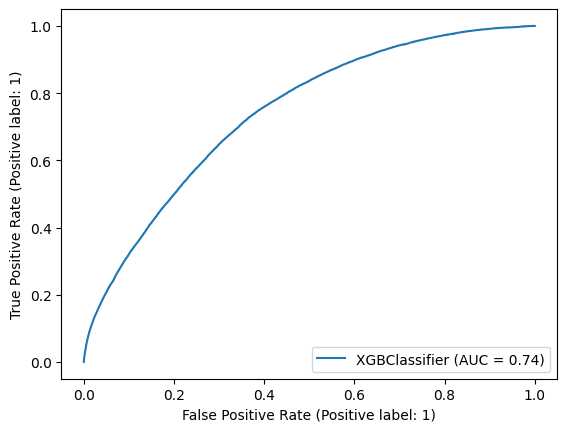

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_xgb_model,X = X_test,y=y_test)

This is a good curve, since the area under the ROC curve is more, 0.74

## Test dataset from Kaggle
Let's predict!

We load the test data

In [ ]:
# This cell has to be run ONLY if you are using google colab on google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/MyDrive/Colab Notebooks/nyu/Labs/data/test.csv"
testdf = pd.read_csv(path, dtype={'id': str})

We format the dataset as we did for the train set

In [ ]:
testdf['weekday'] = testdf['hour'].apply(lambda x:datesplit(x).weekday())
testdf['day'] = testdf['hour'].apply(lambda x:datesplit(x).day)
testdf['hour'] = testdf['hour'].apply(lambda x:datesplit(x).hour)
testdf.banner_pos.replace([2,3,4,5,7], 2, inplace = True)
testdf.C1.replace([1012,1007,1001,1008], 1001, inplace = True)
testdf.drop(['C14'], axis=1, inplace=True)
testdf.drop(['C20'], axis=1, inplace=True)

In [ ]:
testdata = testdf.copy()
testdata = testdata[['id']+sparse_features+dense_features]
for sparse_feature in sparse_features:
    testdata[sparse_feature] = encoder.fit_transform(testdata[sparse_feature])
testdata[dense_features] = scaler.fit_transform(testdata[dense_features])

Now we apply XGBoost with the 'best' parameters on this test set to get the soft prediction values

In [ ]:
xgb_pred_proba = best_xgb_model.predict_proba(testdata.drop(columns=['id']))

In [ ]:
ydf = pd.DataFrame({'id': testdata['id'], 'click': xgb_pred_proba[:,1]})

In [ ]:
ydf.head()

,id,click
0,10000174058809263569,0.176922
1,10000182526920855428,0.252551
2,10000554139829213984,0.095085
3,10001094637809798845,0.082986
4,10001377041558670745,0.014404


In [ ]:
ydf.shape

(4577464, 2)

## Download the dataset

In [ ]:
from google.colab import files

In [ ]:
# Save DataFrame to CSV
ydf.to_csv('submission.csv', index=False)

In [ ]:
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

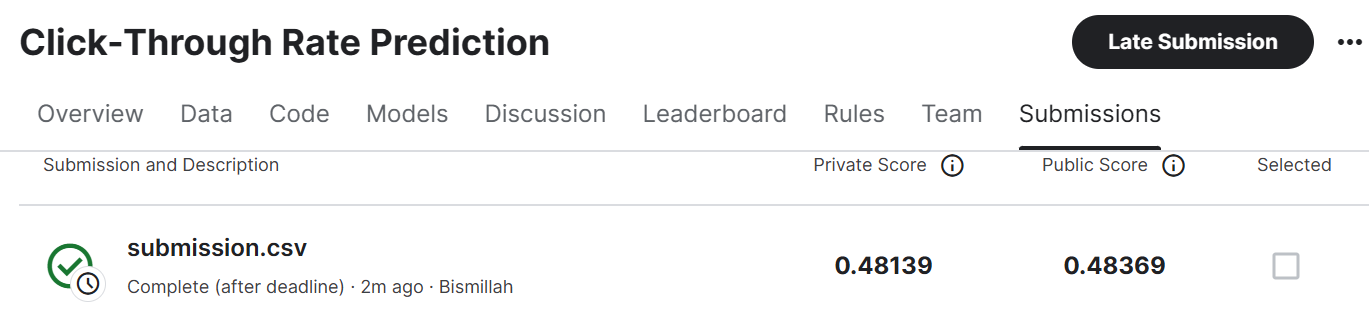

All that hard work for a 0.48! I'll take that:)

Signing off